### Import required libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\PROJECT\01-EDA\Diwali Sales Analysis\Diwali Sales Data.csv", encoding='unicode_escape')

### Perform data preparation and cleaning

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.drop(["Status","unnamed1"], axis = 1, inplace = True)

In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.shape

(11251, 13)

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(11239, 13)

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Perform exploratory data analysis and visualization

1. Gender spending the most

<Axes: xlabel='Gender', ylabel='Amount'>

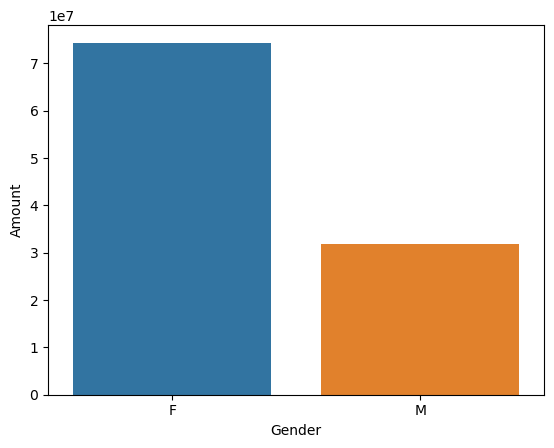

In [17]:
sales_gender = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = ['Amount'], ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gender, hue = 'Gender')

2. Mariatal Status

<Axes: xlabel='Marital_Status', ylabel='Amount'>

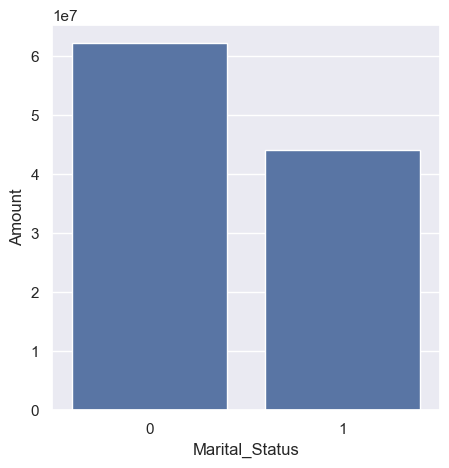

In [19]:
sales_marr = df.groupby(['Marital_Status'], as_index = False)['Amount'].sum().sort_values(by = ['Amount'], ascending = False)
sns.set(rc={"figure.figsize":(5, 5)})
sns.barplot(x= 'Marital_Status', y = 'Amount', data = sales_marr)

3. Age Group

<Axes: xlabel='Age Group', ylabel='Amount'>

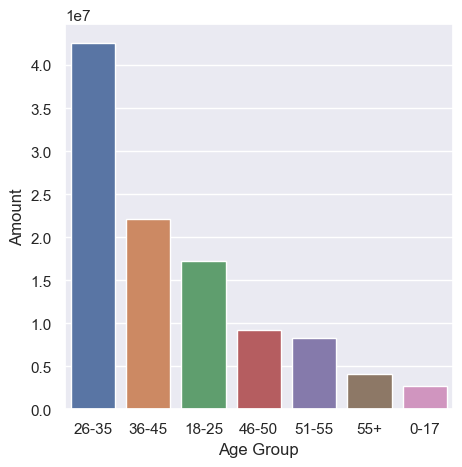

In [21]:
sales_age_grp = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(data = sales_age_grp, x = 'Age Group', y = 'Amount', hue = 'Age Group')

4. Orders as per state

<Axes: xlabel='State', ylabel='Orders'>

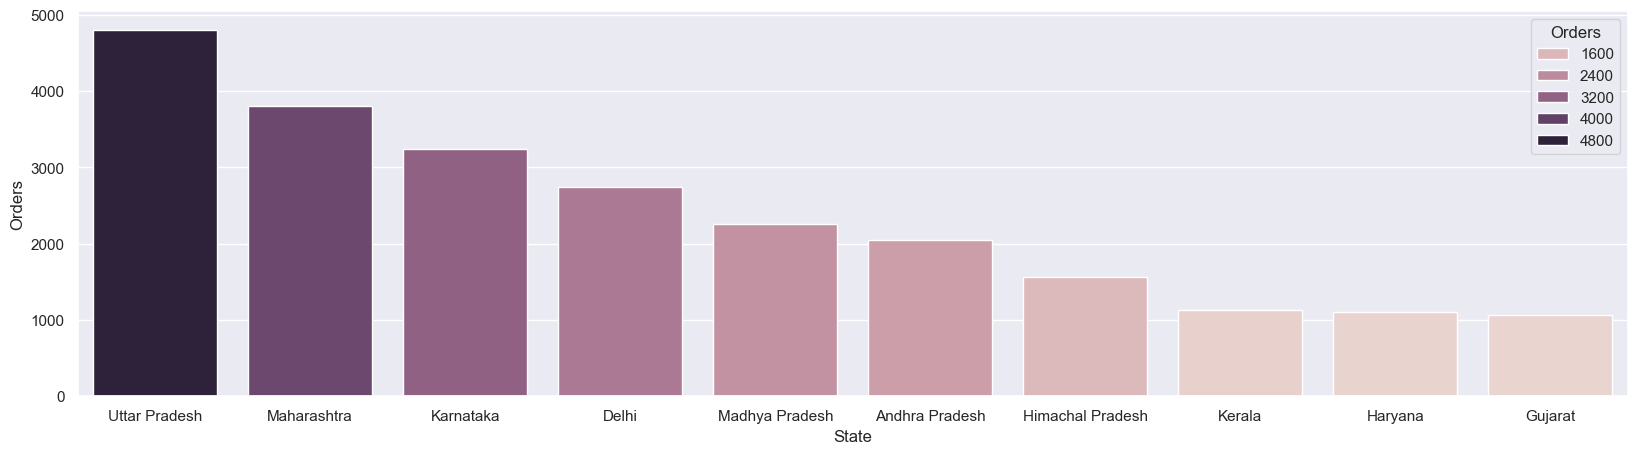

In [23]:
sales_orders = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = ['Orders'], ascending = False).head(10)
sns.set(rc={"figure.figsize":(20, 5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_orders, hue = 'Orders')

5. Occupation

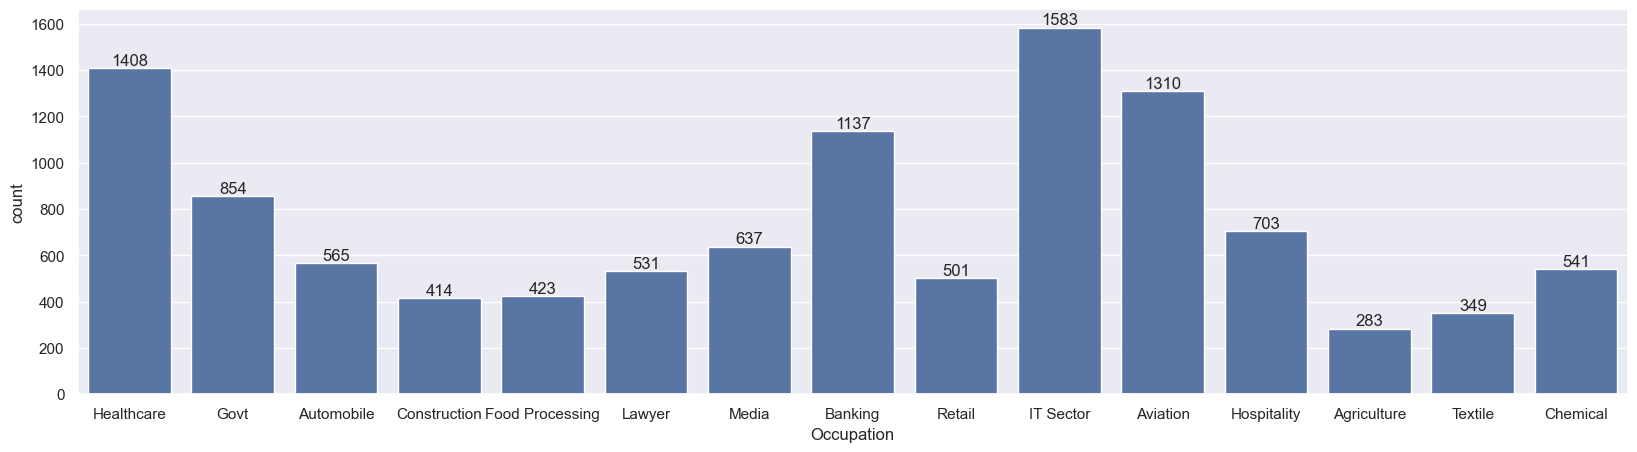

In [25]:
occ = sns.countplot(x = 'Occupation', data = df)

for bars in occ.containers:
    occ.bar_label(bars)

6. Product Category

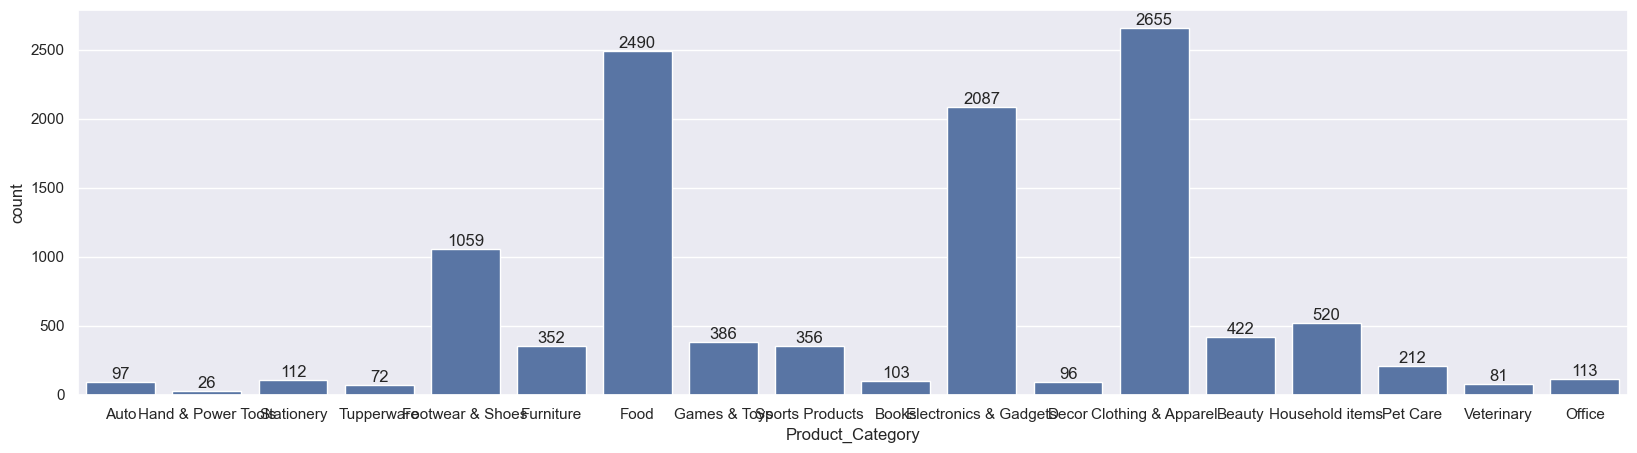

In [27]:
occ = sns.countplot(x = 'Product_Category', data = df)

for bars in occ.containers:
    occ.bar_label(bars)

### Summary

From above analysis, it is concluded that during Diwali mostly married people are shopping among which majority is females.
Most amount is spend between 26-35 age-group.
First five cities orders coming from are Uttar Pradesh, Maharashtra, Karnataka, Delhi, Madhya Pradesh.
People are working in following occupation sectors IT sector, Healthcare, Aviation, Banking, Government, respectively.
Most products purchased are from category Clothing and Apparel, Food, Electronics and Gadgets, Footwear and shoes, HouseHold Items.
